In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
os.getcwd()
df=pd.read_excel('Assignment_Data_vF.xls')
all_data=df


In [18]:
df.isnull().sum()

DATE         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [143]:
df.head()

,DATE,Open,High,Low,Close,Adj Close,Volume
0,1900-01-01,9646.700195,9647.049805,9598.500000,9616.400391,9616.400391,141400.0
1,1900-01-02,9615.549805,9654.150391,9595.400391,9606.900391,9606.900391,129700.0
2,1900-01-03,9621.549805,9627.400391,9580.450195,9618.150391,9618.150391,181800.0
3,1900-01-04,9617.900391,9621.400391,9560.799805,9578.049805,9578.049805,171100.0
4,1900-01-05,9595.450195,9615.849609,9565.500000,9588.049805,9588.049805,213200.0


In [144]:
df['Adj Close'] = df['Adj Close'].fillna(df['Adj Close'].mean())
df['Open'] = df['Open'].fillna(df['Open'].mean())
df['High'] = df['High'].fillna(df['High'].mean())
df['Low'] = df['Low'].fillna(df['Low'].mean())
df['Close'] = df['Close'].fillna(df['Close'].mean())
df['Volume'] = df['Volume'].fillna(df['Volume'].mean())






In [147]:
df.isnull().sum()

DATE         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [148]:
### Data Collection
import pandas_datareader as pdr
key=""

In [149]:
df.tail()

,DATE,Open,High,Low,Close,Adj Close,Volume
1162,1903-03-08,16847.949219,17148.550781,16843.800781,17092.199219,17092.199219,300100.0
1163,1903-03-09,17194.500000,17220.699219,17027.849609,17063.250000,17063.250000,200200.0
1164,1903-03-10,16548.900391,16705.250000,16203.250000,16247.950195,16247.950195,458000.0
1165,1903-03-11,16515.650391,16748.800781,16478.300781,16658.400391,16658.400391,329800.0
1166,1903-03-12,16481.599609,16815.900391,16356.299805,16793.900391,16793.900391,404200.0


In [150]:
df1=df.reset_index()['Adj Close']

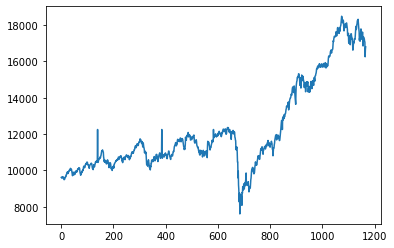

In [151]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [152]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [153]:
print(df1)

[[0.18461279]
 [0.18373857]
 [0.18477383]
 ...
 [0.79487058]
 [0.8326416 ]
 [0.84511077]]


In [154]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [155]:

training_size,test_size

(875, 292)

In [156]:
train_data

array([[0.18461279],
       [0.18373857],
       [0.18477383],
       [0.18108364],
       [0.18200387],
       [0.1883995 ],
       [0.18802682],
       [0.18619552],
       [0.18586427],
       [0.1807984 ],
       [0.17495033],
       [0.17309602],
       [0.17427849],
       [0.17582455],
       [0.18448392],
       [0.18432746],
       [0.18656361],
       [0.1899639 ],
       [0.18915869],
       [0.19884415],
       [0.2002245 ],
       [0.20298979],
       [0.20994681],
       [0.20945443],
       [0.21217838],
       [0.20400672],
       [0.21067374],
       [0.20825355],
       [0.21211395],
       [0.21682098],
       [0.21665068],
       [0.22181325],
       [0.22180399],
       [0.22124727],
       [0.2270079 ],
       [0.23046345],
       [0.22741284],
       [0.22116909],
       [0.22602332],
       [0.22519511],
       [0.21793901],
       [0.21145136],
       [0.20337172],
       [0.19329974],
       [0.20096995],
       [0.21046211],
       [0.21109252],
       [0.204

In [157]:

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [158]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [159]:
print(X_train.shape), print(y_train.shape)

(774, 100)
(774,)


(None, None)

In [160]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [161]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [162]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [163]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_22 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [164]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 8s 195ms/step - loss: 0.0237 - val_loss: 0.1267
Epoch 2/100
13/13 [==============================] - 2s 122ms/step - loss: 0.0038 - val_loss: 0.0424
Epoch 3/100
13/13 [==============================] - 2s 125ms/step - loss: 0.0026 - val_loss: 0.0495
Epoch 4/100
13/13 [==============================] - 2s 128ms/step - loss: 0.0022 - val_loss: 0.0367
Epoch 5/100
13/13 [==============================] - 2s 126ms/step - loss: 0.0020 - val_loss: 0.0299
Epoch 6/100
13/13 [==============================] - 2s 127ms/step - loss: 0.0017 - val_loss: 0.0121
Epoch 7/100
13/13 [==============================] - 2s 127ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 8/100
13/13 [==============================] - 2s 123ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 9/100
13/13 [==============================] - 2s 125ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 10/100
13/13 [==============================] - 2s 125ms/step - loss: 0.0013 - val_lo

In [165]:
import tensorflow as tf

In [166]:

tf.__version__

'2.9.1'

In [167]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


6/6 [==============================] - 0s 27ms/step


In [168]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [173]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

10999.919089144014

In [174]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

16617.23921325833

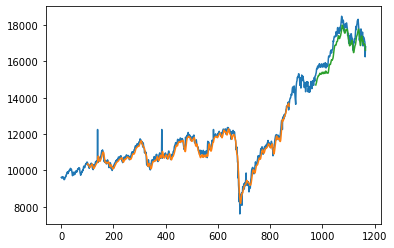

In [176]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [177]:
len(test_data)

292

In [178]:
x_input=test_data[192:].reshape(1,-1)
x_input.shape

(1, 100)

In [179]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [203]:
# demonstrate prediction for next 100 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<100):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.14228515 0.14445999 0.14656219 0.1485943  0.15055959 0.15246163
 0.15430407 0.1560906  0.15782475 0.15950976 0.16114858 0.16274378
 0.1642976  0.16581194 0.16728841 0.16872826 0.17013261 0.17150232
 0.17283829 0.17414102 0.17541122 0.17664944 0.17785619 0.17903206
 0.18017758 0.18129344 0.18238017 0.18343846 0.18446894 0.18547231
 0.18644923 0.1874004  0.18832651 0.18922824 0.1901063  0.19096129
 0.19179387 0.19260465 0.19339421 0.19416319 0.19491202 0.19564129
 0.19635151 0.19704328 0.19771686 0.19837283 0.19901162 0.19963366
 0.20023932 0.20082903 0.20140314 0.20196217 0.20250639 0.20303616
 0.20355186 0.20405388 0.20454249 0.20501807 0.20548098 0.20593147
 0.20636988 0.20679654 0.20721172 0.20761576 0.20800889 0.20839144
 0.2087636  0.2091257  0.20947801 0.20982076 0.21015416 0.21047851
 0.21079402 0.21110091 0.21139939 0.21168973 0.21197206 0.21224664
 0.21251372 0.21277337 0.2130259  0.21327139 0.2135101  0.21374224
 0.21396787 0.21418722 0.21440049 0.21460785 0.214

In [204]:
scaler.inverse_transform(lst_output)
print(scaler.inverse_transform(lst_output))#predicted value for next 100 days

[[ 9966.47655613]
 [ 9967.98669619]
 [ 9969.45279185]
 [ 9970.87759588]
 [ 9972.26127022]
 [ 9973.60624377]
 [ 9974.91186883]
 [ 9976.18073625]
 [ 9977.41300795]
 [ 9978.60981743]
 [ 9979.7718124 ]
 [ 9980.90077407]
 [ 9981.99702629]
 [ 9983.06170256]
 [ 9984.09593638]
 [ 9985.10021352]
 [ 9986.07582942]
 [ 9987.02246022]
 [ 9987.94188712]
 [ 9988.83443398]
 [ 9989.70172008]
 [ 9990.54309771]
 [ 9991.36051   ]
 [ 9992.15395696]
 [ 9992.92424822]
 [ 9993.67203149]
 [ 9994.39779256]
 [ 9995.102503  ]
 [ 9995.78681052]
 [ 9996.45022933]
 [ 9997.09518836]
 [ 9997.72103988]
 [ 9998.3282697 ]
 [ 9998.91817322]
 [ 9999.49026467]
 [10000.04535368]
 [10000.58457375]
 [10001.10792489]
 [10001.6160548 ]
 [10002.10896348]
 [10002.586489  ]
 [10003.05073643]
 [10003.50170577]
 [10003.93842546]
 [10004.36300054]
 [10004.77478332]
 [10005.17377379]
 [10005.56159123]
 [10005.93807371]
 [10006.30289738]
 [10006.65719574]
 [10007.00080685]
 [10007.33437843]
 [10007.65823433]
 [10007.97205069]
 [10008.27

In [195]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [196]:
import matplotlib.pyplot as plt

In [197]:
len(df1)

1167

ValueError: x and y must have same first dimension, but have shapes (30,) and (100, 1)

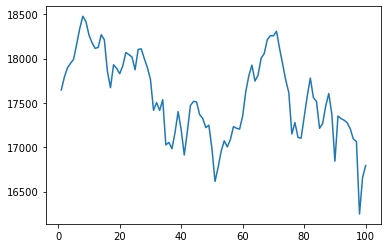

In [202]:
plt.plot(day_new,scaler.inverse_transform(df1[1067:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

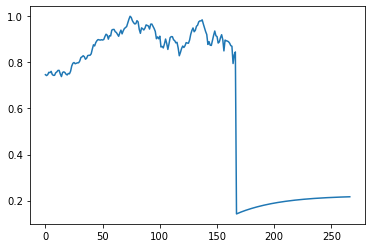

In [191]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])


In [124]:
df3=scaler.inverse_transform(df3).tolist()

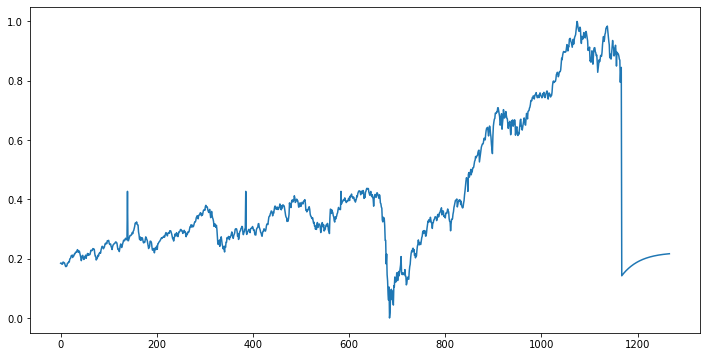

In [216]:
plt.figure(figsize=(12,6))
plt.plot(df3)